In [1]:

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [2]:
heart_df = pd.read_csv('heart.csv')

In [3]:
heart_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [4]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [5]:
heart_df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
heart_df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


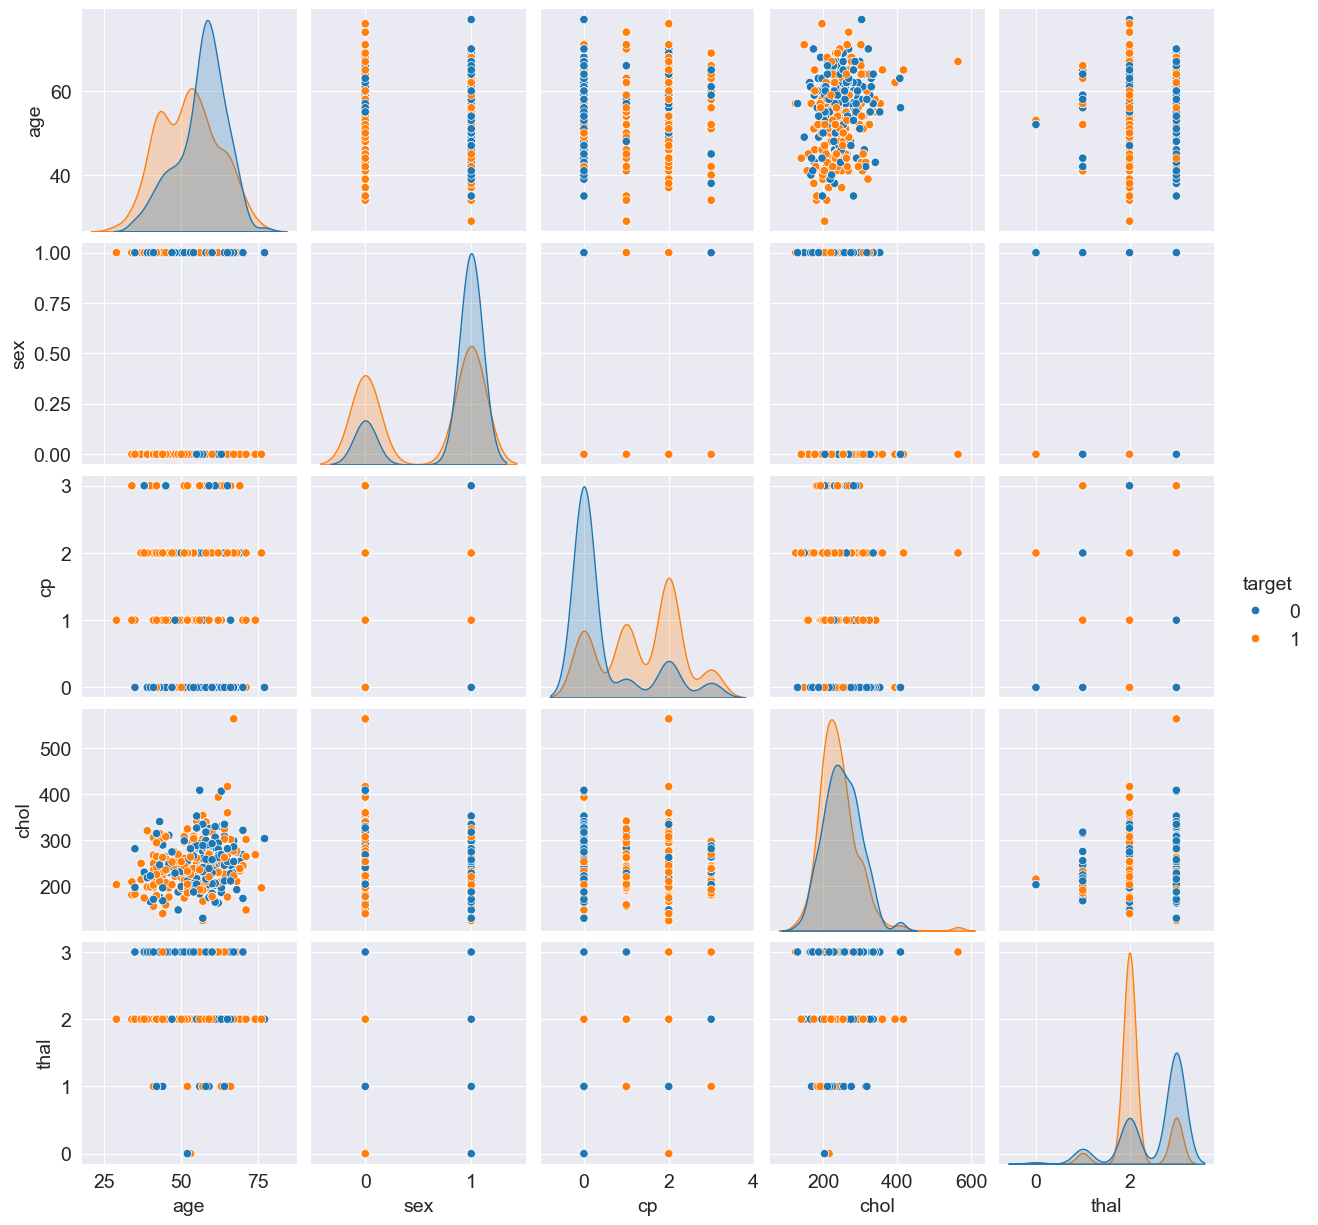

In [7]:
sns.pairplot(heart_df, hue = 'target', 
             vars = ['age', 'sex', 'cp', 'chol', 'thal'] )

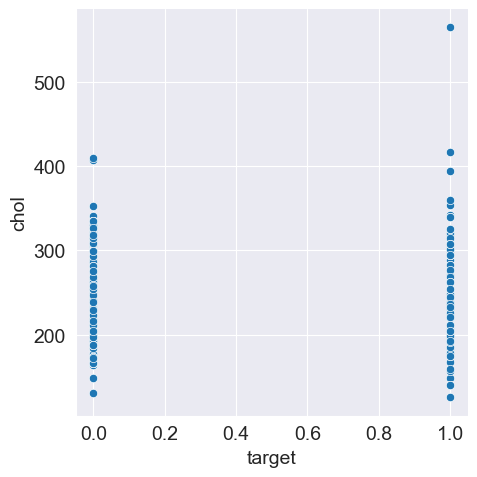

In [8]:
sns.relplot(heart_df, y="chol", x="target")

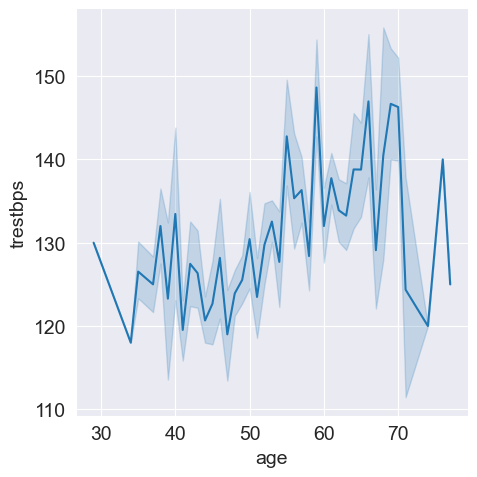

In [9]:
sns.relplot(heart_df, x="age", y="trestbps", kind="line")

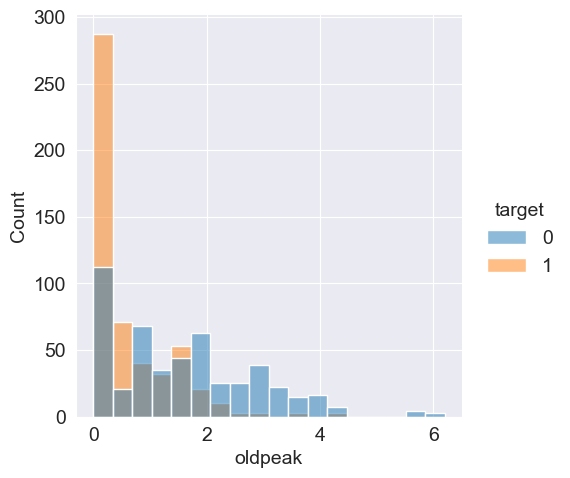

In [10]:
sns.displot(heart_df, x="oldpeak",hue='target')

In [11]:
heart_df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
cp,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
trestbps,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
chol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
fbs,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
restecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
thalach,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
exang,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
oldpeak,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441


In [12]:
input_cols = list(heart_df.columns)[1:-1]
target_col = 'target'

In [13]:
train_val_df, test_df = train_test_split(heart_df, test_size=0.2, random_state=42)

train_df, val_df = train_test_split(train_val_df, test_size=0.25, random_state=42)

In [14]:
train_inputs, train_targets = train_df[input_cols].copy(), train_df[target_col].copy()
val_inputs, val_targets = val_df[input_cols].copy(), val_df[target_col].copy()
test_inputs, test_targets = test_df[input_cols].copy(), test_df[target_col].copy()

In [15]:
scaler = MinMaxScaler()
scaler.fit(heart_df[input_cols])

MinMaxScaler()

In [16]:

train_inputs = scaler.transform(train_inputs)
val_inputs = scaler.transform(val_inputs)
test_inputs = scaler.transform(test_inputs)

In [17]:
X_train = train_inputs
X_val = val_inputs
X_test = test_inputs

In [18]:
model = DecisionTreeClassifier(random_state=42)

In [19]:
%%time
model.fit(X_train, train_targets)

CPU times: total: 0 ns
Wall time: 2.07 ms


DecisionTreeClassifier(random_state=42)

In [20]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [21]:
train_preds = model.predict(X_train)

In [22]:
train_preds

array([1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0,

In [23]:
pd.Series(train_preds).value_counts()

1    316
0    299
Name: count, dtype: int64

In [24]:
train_probs = model.predict_proba(X_train)

In [25]:
train_probs

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [1., 0.]])

In [26]:
accuracy_score(train_targets, train_preds)

1.0

In [27]:
model.score(X_val, val_targets)

0.9560975609756097

In [28]:
val_targets.value_counts() / len(val_targets)

target
1    0.521951
0    0.478049
Name: count, dtype: float64

### Visualization



In [29]:
from sklearn.tree import plot_tree, export_text

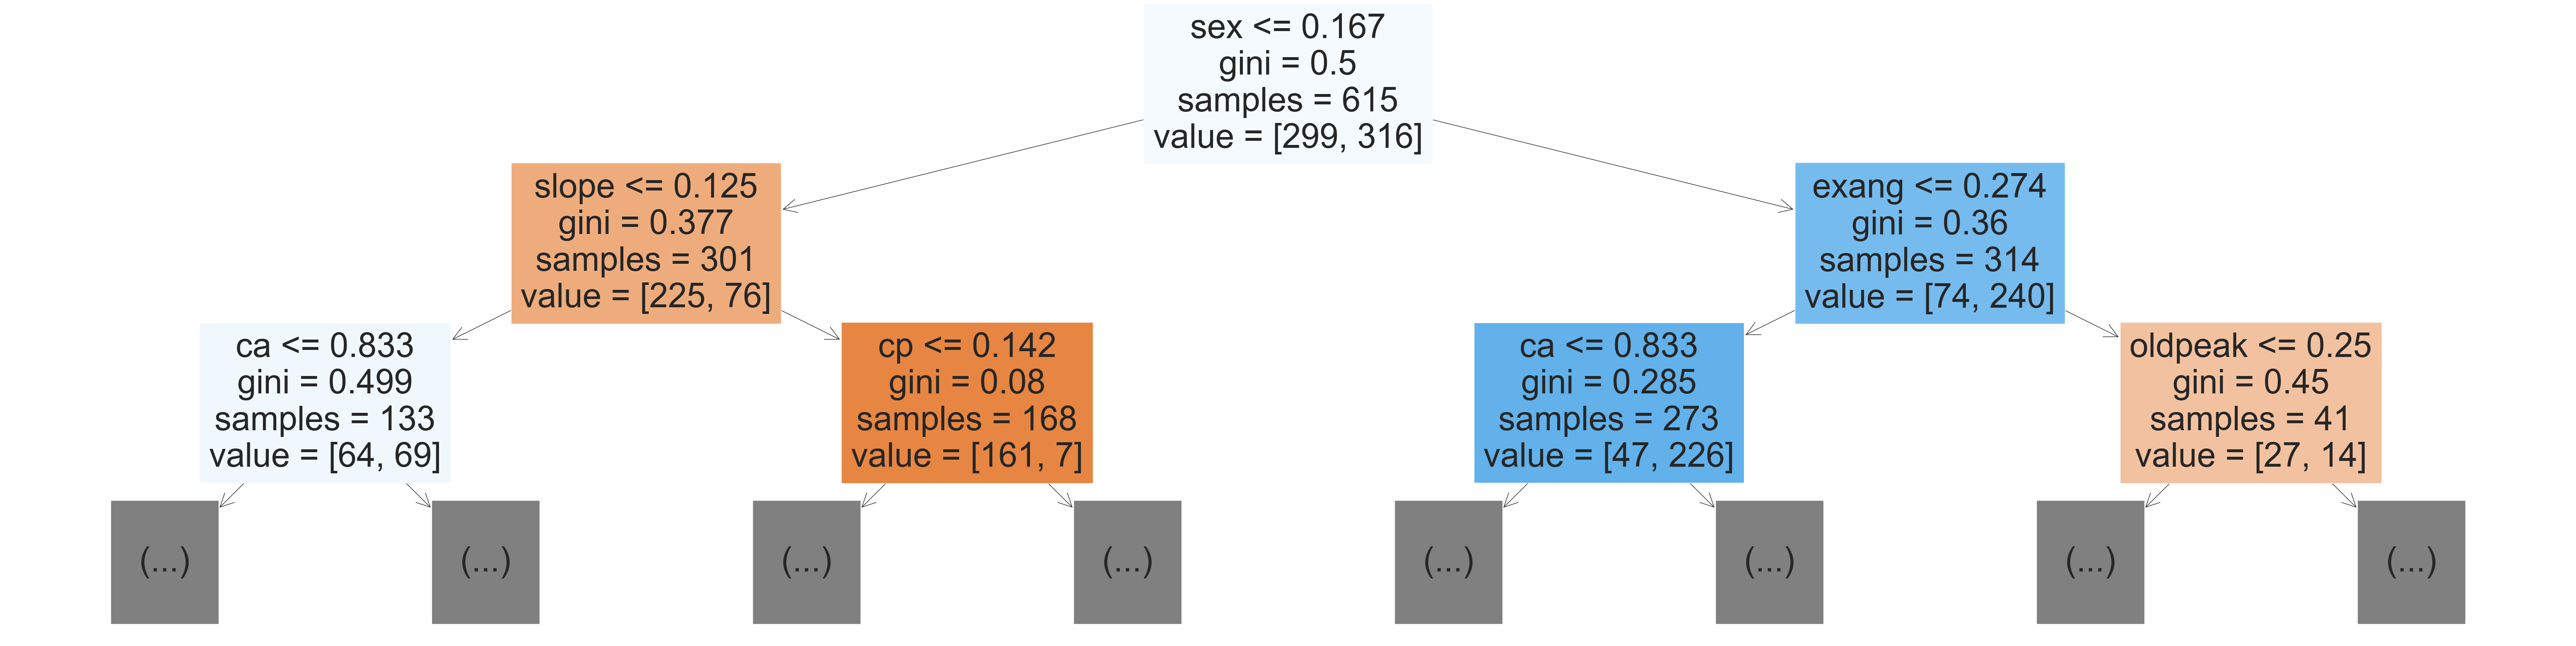

In [30]:
plt.figure(figsize=(80,20))
plot_tree(model, feature_names=train_df.columns, max_depth=2, filled=True);

In [31]:
tree_text = export_text(model, max_depth=10, feature_names=list(heart_df[input_cols]))
print(tree_text[:5000])

|--- cp <= 0.17
|   |--- ca <= 0.12
|   |   |--- thal <= 0.83
|   |   |   |--- exang <= 0.50
|   |   |   |   |--- thalach <= 0.19
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- thalach >  0.19
|   |   |   |   |   |--- chol <= 0.43
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- chol >  0.43
|   |   |   |   |   |   |--- thalach <= 0.70
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- thalach >  0.70
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |--- exang >  0.50
|   |   |   |   |--- slope <= 0.75
|   |   |   |   |   |--- restecg <= 0.25
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- restecg >  0.25
|   |   |   |   |   |   |--- trestbps <= 0.20
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- trestbps >  0.20
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- slope >  0.75
|   |   |   |   |   |--- class: 1
|   |   |--- thal >  0.83
|   |   |   |--- oldpeak <= 0.10
|   |   |   |   |--- 

In [32]:
model.feature_importances_

array([0.00545851, 0.26951122, 0.08373896, 0.11075224, 0.00252434,
       0.03042119, 0.05898878, 0.03468908, 0.11317944, 0.07322466,
       0.11110968, 0.10640191])

In [33]:
importance_df = pd.DataFrame({
    'feature': input_cols,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

In [34]:
importance_df.head(10)

,feature,importance
1,cp,0.269511
8,oldpeak,0.113179
10,ca,0.111110
3,chol,0.110752
11,thal,0.106402
2,trestbps,0.083739
9,slope,0.073225
6,thalach,0.058989
7,exang,0.034689
5,restecg,0.030421


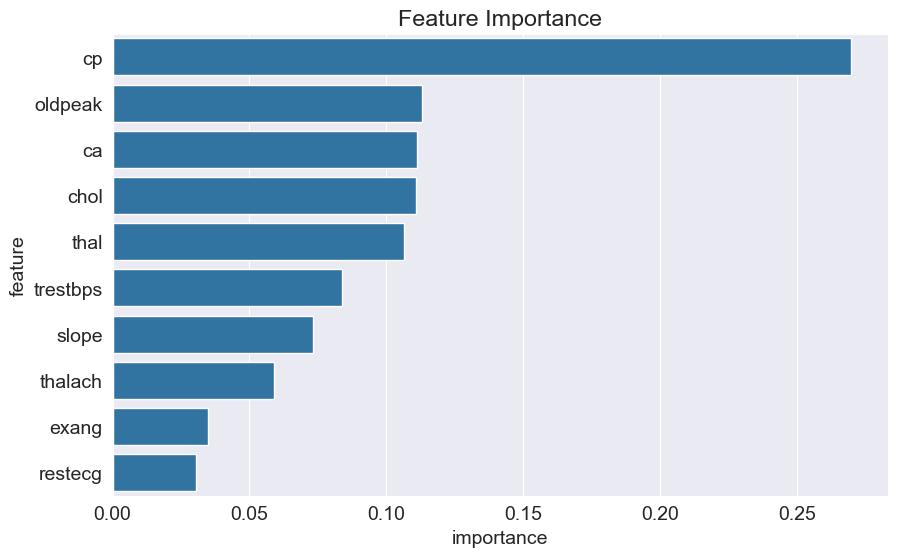

In [35]:
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature');

In [36]:
model = DecisionTreeClassifier(max_depth=3, random_state=42)

In [37]:
model.fit(X_train, train_targets)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [38]:
model.score(X_train, train_targets)

0.8552845528455284

In [39]:
model.score(X_val, val_targets)

0.8585365853658536

In [40]:
model.classes_

array([0, 1], dtype=int64)

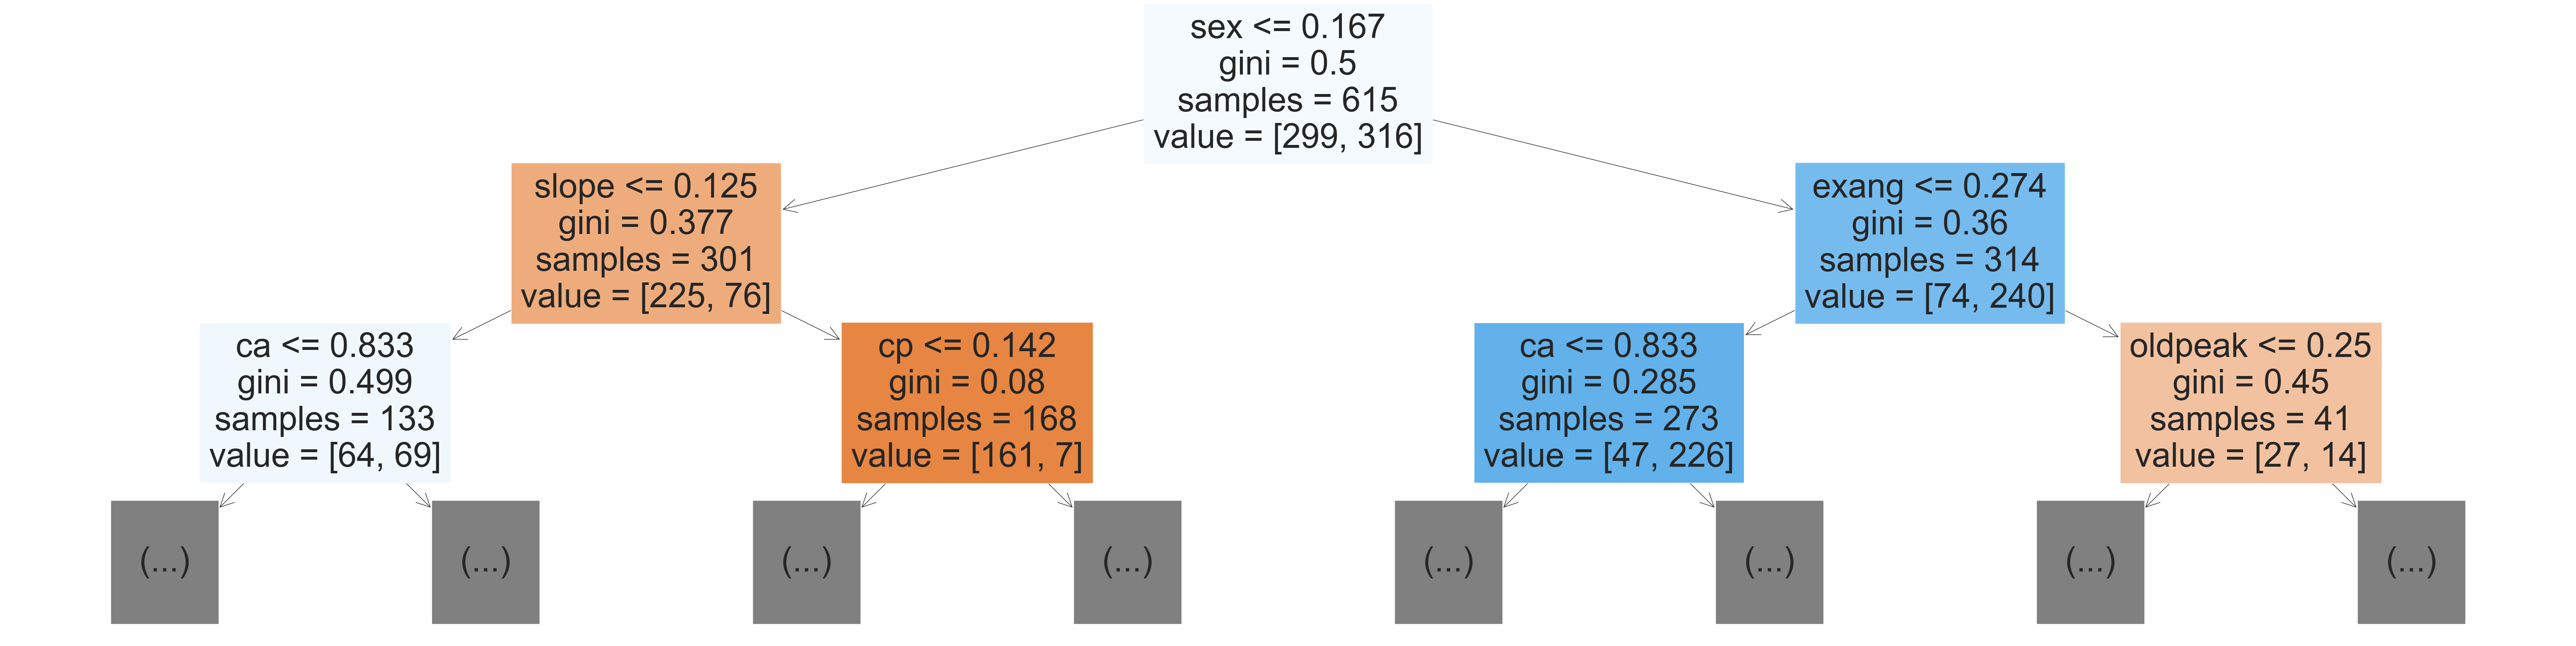

In [41]:
plt.figure(figsize=(80,20))
plot_tree(model, feature_names=train_df.columns, max_depth=2, filled=True);

In [42]:
print(export_text(model, feature_names=list(heart_df[input_cols])))

|--- cp <= 0.17
|   |--- ca <= 0.12
|   |   |--- thal <= 0.83
|   |   |   |--- class: 1
|   |   |--- thal >  0.83
|   |   |   |--- class: 0
|   |--- ca >  0.12
|   |   |--- trestbps <= 0.14
|   |   |   |--- class: 0
|   |   |--- trestbps >  0.14
|   |   |   |--- class: 0
|--- cp >  0.17
|   |--- oldpeak <= 0.27
|   |   |--- thal <= 0.83
|   |   |   |--- class: 1
|   |   |--- thal >  0.83
|   |   |   |--- class: 1
|   |--- oldpeak >  0.27
|   |   |--- slope <= 0.25
|   |   |   |--- class: 1
|   |   |--- slope >  0.25
|   |   |   |--- class: 0



In [43]:
def max_depth_error(md):
    model = DecisionTreeClassifier(max_depth=md, random_state=42)
    model.fit(X_train, train_targets)
    train_acc = 1 - model.score(X_train, train_targets)
    val_acc = 1 - model.score(X_val, val_targets)
    return {'Max Depth': md, 'Training Error': train_acc, 'Validation Error': val_acc}

In [44]:
%%time
errors_df = pd.DataFrame([max_depth_error(md) for md in range(1, 21)])

CPU times: total: 93.8 ms
Wall time: 98.8 ms


In [45]:
errors_df

,Max Depth,Training Error,Validation Error
0,1,0.243902,0.219512
1,2,0.214634,0.229268
2,3,0.144715,0.141463
3,4,0.118699,0.126829
4,5,0.066667,0.117073
5,6,0.037398,0.092683
6,7,0.021138,0.068293
7,8,0.016260,0.058537
8,9,0.009756,0.058537
9,10,0.004878,0.043902


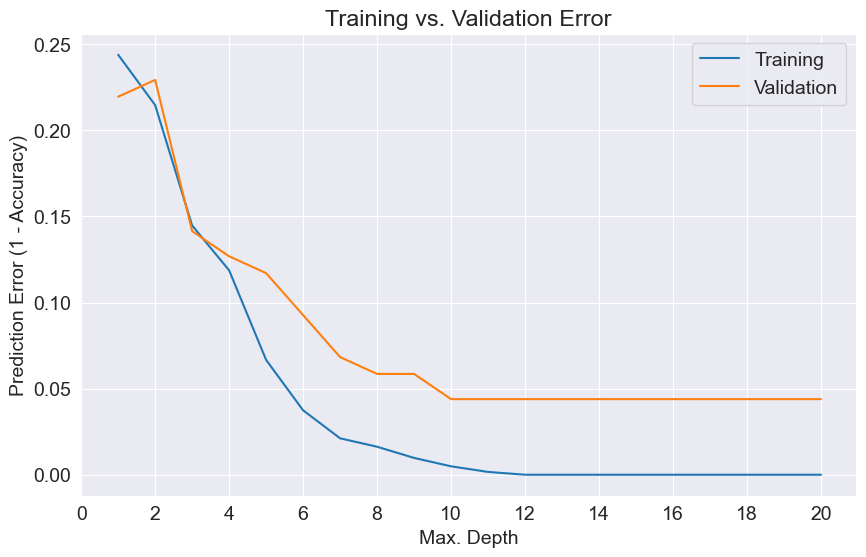

In [46]:
plt.figure()
plt.plot(errors_df['Max Depth'], errors_df['Training Error'])
plt.plot(errors_df['Max Depth'], errors_df['Validation Error'])
plt.title('Training vs. Validation Error')
plt.xticks(range(0,21, 2))
plt.xlabel('Max. Depth')
plt.ylabel('Prediction Error (1 - Accuracy)')
plt.legend(['Training', 'Validation'])

In [47]:
model = DecisionTreeClassifier(max_depth=7, random_state=42).fit(X_train, train_targets)
model.score(X_val, val_targets)

0.9317073170731708

In [48]:
model = DecisionTreeClassifier(max_leaf_nodes=128, random_state=42)

In [49]:
model.fit(X_train, train_targets)

DecisionTreeClassifier(max_leaf_nodes=128, random_state=42)

In [50]:
model.score(X_train, train_targets)

1.0

In [51]:
model.score(X_val, val_targets)

0.9560975609756097

In [52]:
model.tree_.max_depth

12

In [53]:
model_text = export_text(model, feature_names=list(heart_df[input_cols]))
print(model_text[:3000])

|--- cp <= 0.17
|   |--- ca <= 0.12
|   |   |--- thal <= 0.83
|   |   |   |--- exang <= 0.50
|   |   |   |   |--- thalach <= 0.19
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- thalach >  0.19
|   |   |   |   |   |--- chol <= 0.43
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- chol >  0.43
|   |   |   |   |   |   |--- trestbps <= 0.39
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- trestbps >  0.39
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |--- exang >  0.50
|   |   |   |   |--- slope <= 0.75
|   |   |   |   |   |--- restecg <= 0.25
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- restecg >  0.25
|   |   |   |   |   |   |--- trestbps <= 0.20
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- trestbps >  0.20
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- slope >  0.75
|   |   |   |   |   |--- class: 1
|   |   |--- thal >  0.83
|   |   |   |--- oldpeak <= 0.10
|   |   |   |   |--

## Training a Random Forest

In [54]:
model = RandomForestClassifier(n_jobs=-1, random_state=42)

In [55]:
%%time
model.fit(X_train, train_targets)

CPU times: total: 516 ms
Wall time: 448 ms


RandomForestClassifier(n_jobs=-1, random_state=42)

In [56]:
model.score(X_train, train_targets)

1.0

In [57]:
model.score(X_val, val_targets)

0.9951219512195122

In [58]:
train_probs = model.predict_proba(X_train)
train_probs

array([[0.01, 0.99],
       [1.  , 0.  ],
       [1.  , 0.  ],
       ...,
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.88, 0.12]])

In [59]:
model.estimators_[0]

DecisionTreeClassifier(max_features='sqrt', random_state=1608637542)

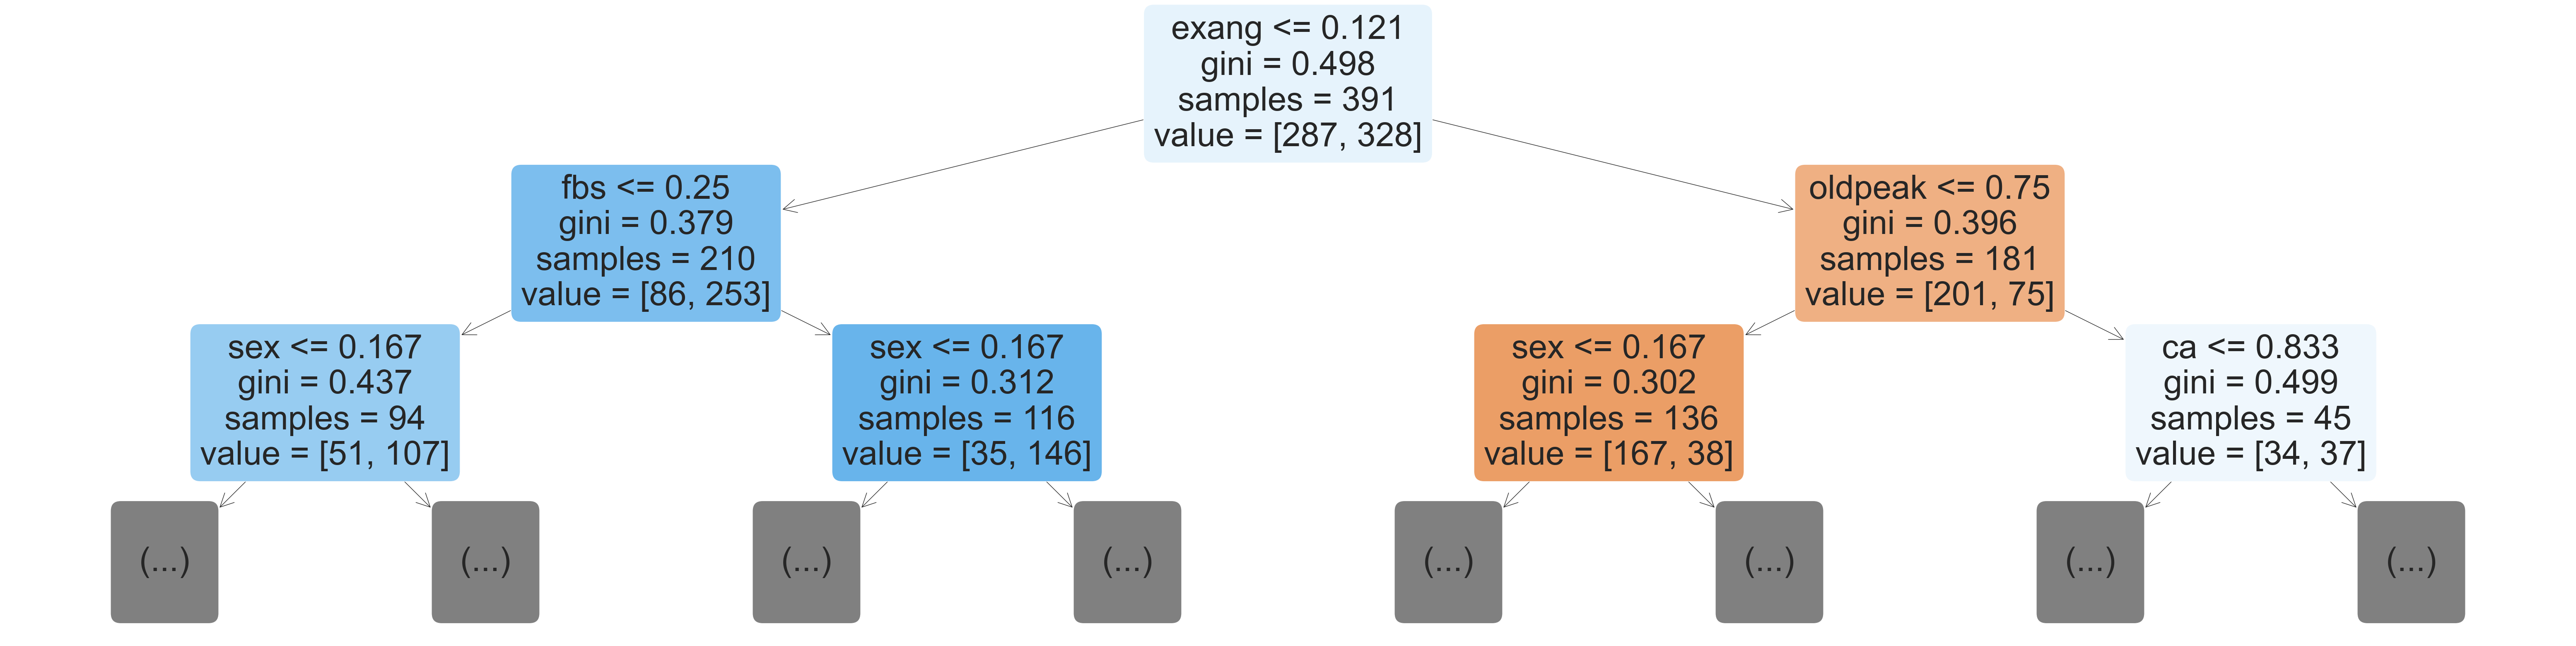

In [60]:
plt.figure(figsize=(80,20))
plot_tree(model.estimators_[0], max_depth=2, feature_names=train_df.columns, filled=True, rounded=True);

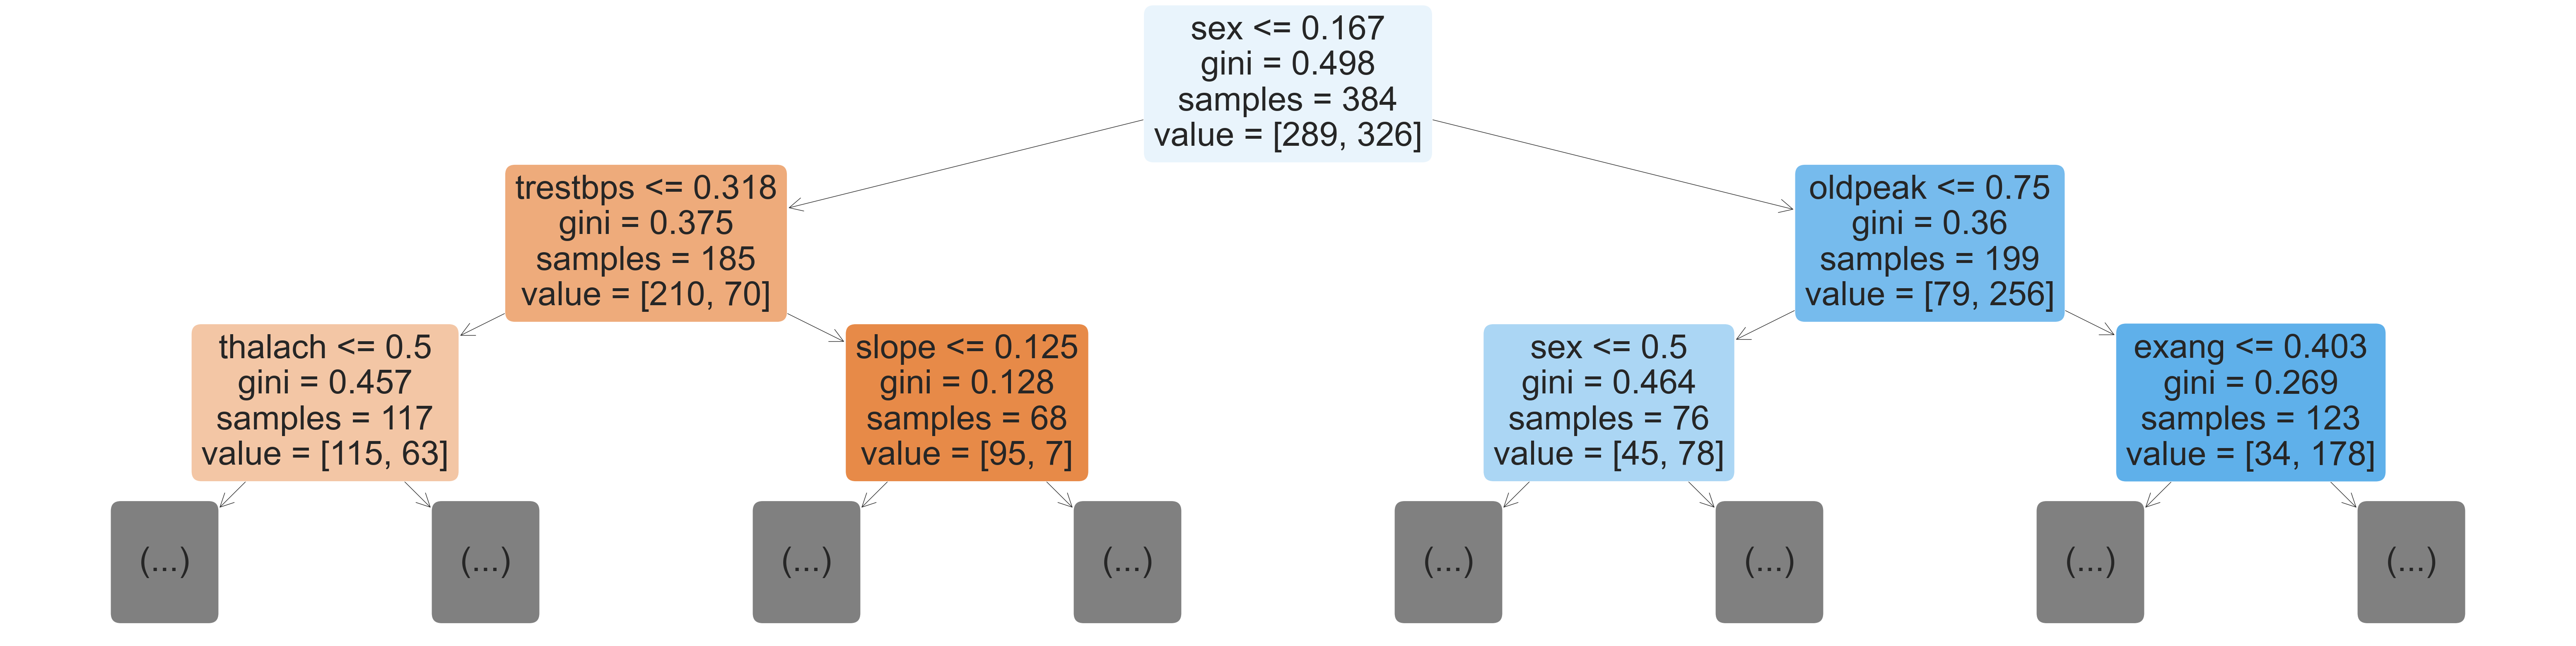

In [61]:
plt.figure(figsize=(80,20))
plot_tree(model.estimators_[20], max_depth=2, feature_names=train_df.columns, filled=True, rounded=True);

In [62]:
len(model.estimators_)

100

In [63]:
importance_df = pd.DataFrame({
    'feature': input_cols,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

In [64]:
importance_df.head(10)

,feature,importance
1,cp,0.158732
8,oldpeak,0.144417
6,thalach,0.126851
10,ca,0.121324
3,chol,0.101326
11,thal,0.097349
2,trestbps,0.083747
9,slope,0.052303
7,exang,0.044618
0,sex,0.038840


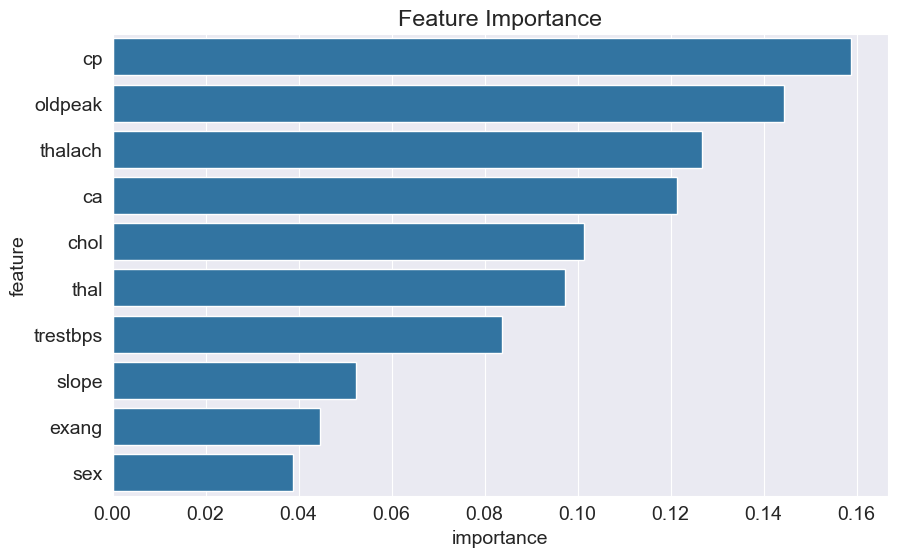

In [65]:
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature');

In [66]:
base_model = RandomForestClassifier(random_state=42, n_jobs=-1).fit(X_train, train_targets)

In [67]:
base_train_acc = base_model.score(X_train, train_targets)
base_val_acc = base_model.score(X_val, val_targets)

In [68]:
base_accs = base_train_acc, base_val_acc
base_accs

(1.0, 0.9951219512195122)

In [69]:
model = RandomForestClassifier(random_state=42, n_jobs=-1, n_estimators=10)

In [70]:
model.fit(X_train, train_targets)

RandomForestClassifier(n_estimators=10, n_jobs=-1, random_state=42)

In [71]:
model.score(X_train, train_targets), model.score(X_val, val_targets)

(0.9967479674796748, 0.9804878048780488)

In [72]:
base_accs

(1.0, 0.9951219512195122)

In [73]:
model = RandomForestClassifier(random_state=42, n_jobs=-1, n_estimators=500)
model.fit(X_train, train_targets)

RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=42)

In [74]:
model.score(X_train, train_targets)

1.0

In [75]:
model.score(X_val, val_targets)

0.9951219512195122

In [76]:
base_accs

(1.0, 0.9951219512195122)

In [77]:
def test_params(**params):
    model = RandomForestClassifier(random_state=42, n_jobs=-1, **params).fit(X_train, train_targets)
    return model.score(X_train, train_targets), model.score(X_val, val_targets)

In [78]:
test_params(max_depth=5)

(0.9544715447154472, 0.9463414634146341)

In [79]:
test_params(max_depth=26)

(1.0, 0.9951219512195122)

In [80]:
test_params(max_leaf_nodes=2**5)

(0.967479674796748, 0.9512195121951219)

In [81]:
test_params(max_leaf_nodes=2**20)

(1.0, 0.9951219512195122)

In [82]:
base_accs # no max depth or max leaf nodes

(1.0, 0.9951219512195122)

In [83]:
test_params(max_features='log2')

(1.0, 0.9951219512195122)

In [84]:
test_params(max_features=3)

(1.0, 0.9951219512195122)

In [85]:
test_params(max_features=6)

(1.0, 0.9951219512195122)

In [86]:
base_accs

(1.0, 0.9951219512195122)

In [87]:
test_params(min_samples_split=3, min_samples_leaf=2)

(0.9934959349593496, 0.9804878048780488)

In [88]:
test_params(min_samples_split=100, min_samples_leaf=60)

(0.8439024390243902, 0.9024390243902439)

In [89]:
base_accs

(1.0, 0.9951219512195122)

In [90]:
test_params(min_impurity_decrease=1e-7)

(1.0, 0.9951219512195122)

In [91]:
test_params(min_impurity_decrease=1e-2)

(0.9024390243902439, 0.9219512195121952)

In [92]:
base_accs

(1.0, 0.9951219512195122)

In [93]:
test_params(bootstrap=False)

(1.0, 0.9951219512195122)

In [94]:
base_accs

(1.0, 0.9951219512195122)

In [95]:
test_params(max_samples=0.9)

(1.0, 0.9951219512195122)

In [96]:
model = RandomForestClassifier(n_jobs=-1, 
                               random_state=42, 
                               n_estimators=500,
                               max_features=7,
                               max_depth=30, 
                               class_weight={'No': 1, 'Yes': 1.5})

In [97]:
import joblib

In [98]:
heart_disease = {
    'model': model,
    'scaler': scaler,
    'input_cols': input_cols,
    'target_col': target_col}
   

In [99]:
joblib.dump(heart_disease, 'heart_disease.joblib')

['heart_disease.joblib']